In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from scipy.special import softmax
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
col_title = 'Pixel'
col_name = ['Label']

for i in range(1,785):
    temp_var = col_title + " " + str(i)
    col_name.append(temp_var)

In [3]:
train_data = pd.read_csv("mnist_train.csv", names=col_name)
train_data.head()

,Label,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data = pd.read_csv("mnist_test.csv",names=col_name)
test_data.head()

,Label,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,...,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783,Pixel 784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_test = test_data.iloc[:,0]
y_test.head()

0    7
1    2
2    1
3    0
4    4
Name: Label, dtype: int64

In [6]:
def LogisticRegressionProbabilityCalculation(trainData, testData, numberValue):
    train_data_temp = train_data
    train_data_temp['Target'] = 0
    train_data_temp.loc[train_data_temp['Label'] == numberValue,'Target'] = 1
    
    test_data_temp = test_data
    test_data_temp['Target'] = 0
    test_data_temp.loc[test_data_temp['Label'] == numberValue, 'Target'] = 1
    
    X_train = train_data_temp.iloc[:,1:-1]
    y_train = train_data_temp.iloc[:,-1]
    
    X_test = test_data_temp.iloc[:,1:-1]
    y_test = test_data_temp.iloc[:,-1]
    
    model = LogisticRegression()
    model.fit(X_train,y_train)
    
    #y_pred = model.predict(X_test)
    probValue = model.predict_proba(X_test)
    
    return probValue[:,1]

In [7]:
target_unique = train_data['Label'].unique()
for i in target_unique:
    print(target_unique[i])

2
5
9
0
8
4
1
3
6
7


In [8]:
probability_data = pd.DataFrame()

for i in range(0,10):
    probability_data[str(i)] = LogisticRegressionProbabilityCalculation(train_data,test_data,i)
    
probability_data

,0,1,2,3,4,5,6,7,8,9
0,8.246156e-19,3.561603e-20,8.064643e-15,1.876331e-02,1.960661e-07,0.000179,6.188154e-24,9.980606e-01,2.156544e-04,1.024309e-03
1,8.564662e-09,1.843234e-11,9.954512e-01,2.092873e-09,1.123363e-18,0.101537,5.755754e-02,3.094888e-55,8.473012e-08,2.601989e-32
2,3.136920e-07,9.930099e-01,2.520455e-02,6.220000e-03,6.959581e-04,0.009224,8.034760e-03,2.265920e-12,1.388132e-02,1.556933e-03
3,9.995827e-01,8.566800e-13,7.587894e-04,1.474103e-04,1.516161e-07,0.000176,6.130138e-03,1.280008e-04,3.466648e-04,1.525201e-04
4,1.123835e-03,1.888044e-10,5.158355e-03,1.302177e-05,9.526883e-01,0.000032,1.216467e-03,3.253327e-03,2.133305e-02,4.212182e-02
...,...,...,...,...,...,...,...,...,...,...
9995,1.381079e-09,1.243121e-10,9.995972e-01,3.239381e-03,4.661783e-10,0.000006,2.234663e-06,5.241684e-15,4.100354e-02,3.120624e-10
9996,3.398343e-05,2.819534e-09,2.710866e-03,9.922066e-01,7.490137e-12,0.000720,7.559597e-06,1.255576e-10,1.172097e-04,3.766896e-07
9997,1.243199e-09,8.385739e-13,5.278943e-06,5.942501e-05,9.247490e-01,0.002096,3.798961e-17,2.988929e-03,3.935558e-02,3.980554e-02
9998,1.947221e-18,8.303503e-24,1.128604e-08,1.416578e-14,2.358171e-05,0.997158,2.427064e-08,4.394150e-23,1.645769e-01,1.285100e-12


In [9]:
softmax_array = np.array(probability_data.iloc[:,:])

final_data = softmax(softmax_array, axis = 0)

softMaxData = pd.DataFrame(final_data)

predicted_ans = softMaxData.idxmax(axis = 1)

In [10]:
confusionMatrix = cm(predicted_ans, test_data['Label'])
confusionMatrix

array([[ 958,    0,    9,    4,    1,    8,    8,    4,   10,    7],
       [   0, 1108,    8,    0,    2,    1,    4,    7,   13,    7],
       [   2,    4,  904,   16,    4,    0,    7,   23,    6,    2],
       [   1,    3,   20,  912,    5,   34,    0,    5,   19,   13],
       [   0,    0,    7,    2,  910,   10,    5,    7,   11,   29],
       [   6,    1,    7,   29,    2,  777,   22,    4,   26,   13],
       [   7,    5,   11,    5,    8,   16,  906,    1,   10,    0],
       [   2,    1,   14,   10,    3,    6,    0,  940,   11,   27],
       [   3,   13,   49,   24,   10,   33,    6,    7,  858,   12],
       [   1,    0,    3,    8,   37,    7,    0,   30,   10,  899]])

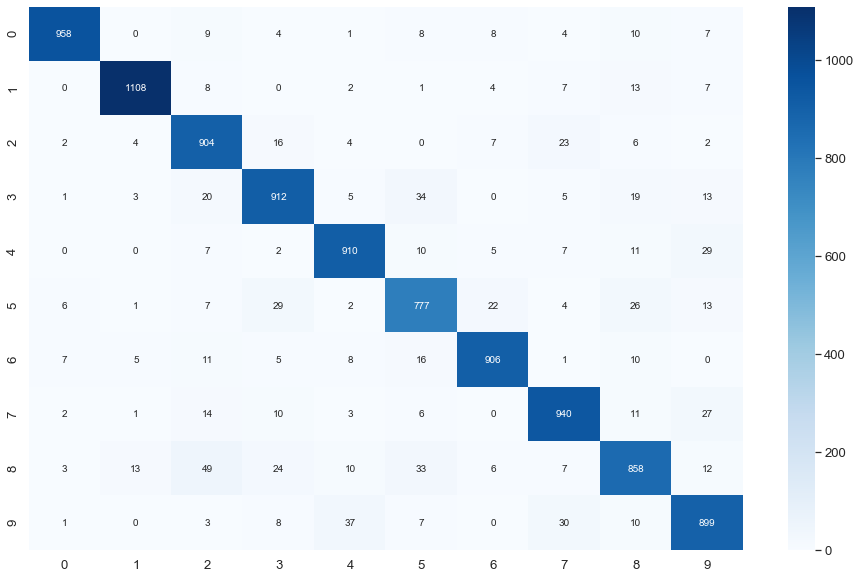

In [11]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.2)
ax = sns.heatmap(confusionMatrix, annot=True, cmap="Blues",annot_kws={"size": 10}, fmt = 'g')
ax.set_ylim(10,0)
plt.show()

In [15]:
#Bagging Algorithm
def BaggingAlgorithm(trainD, testD, number_of_tree):
    
    var = 'Tree'
    model = DecisionTreeClassifier()
    treeDF = pd.DataFrame()
    
    for i in range(number_of_tree):
        
        title = var + " " + str(number_of_tree)
        random_number = random.randint(393,785)
        random_data = trainD.sample(frac = 1.0, replace = True)
        X_train = random_data.iloc[:,1:random_number]
        y_train = random_data.iloc[:,0]
        
        X_test = testD.iloc[:,1:random_number]
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        treeDF[title] = y_pred
        
    return treeDF

In [20]:
tree1 = BaggingAlgorithm(train_data,test_data,1)
cm(y_pred=tree1,y_true=y_test)

array([[ 918,    3,   10,    4,    3,   12,   12,    7,    5,    6],
       [   2, 1095,    7,    9,    1,    8,    4,    1,    7,    1],
       [  18,    5,  852,   39,   14,   14,   23,   35,   23,    9],
       [  13,    5,   19,  854,    5,   51,    6,   18,   16,   23],
       [   7,    3,   15,    8,  835,   17,   29,   12,   20,   36],
       [  32,    8,   10,   49,    9,  707,   18,   13,   24,   22],
       [  11,    5,   11,    9,   17,   23,  844,    4,   23,   11],
       [   2,   10,   33,   15,   13,    3,    1,  921,    9,   21],
       [  22,   10,   30,   33,   23,   41,   18,    9,  751,   37],
       [   6,   11,    8,   22,   46,   19,    5,   23,   20,  849]])

In [21]:
tree10 = BaggingAlgorithm(train_data,test_data,10)
final_value = tree10.mode(axis=1).iloc[:,0]
cm(final_value,y_test)

array([[ 903,    2,   13,    6,   11,    7,   14,    4,   13,   15],
       [   3, 1086,   14,    7,    1,   15,    6,    6,    8,    4],
       [  11,   10,  854,   37,   20,    9,   16,   59,   27,   13],
       [   4,    8,   42,  837,    7,   37,    7,   15,   42,   22],
       [  12,    2,   16,    7,  827,   10,   23,    4,   33,   37],
       [  11,    4,    9,   46,    6,  726,   31,    4,   33,   19],
       [  11,    3,   15,    5,   19,   30,  837,    1,   18,    7],
       [  14,    5,   39,   14,   11,    9,    1,  909,   15,   24],
       [   0,   12,   20,   29,   37,   24,   10,    8,  728,   37],
       [  11,    3,   10,   22,   43,   25,   13,   18,   57,  831]])

In [22]:
tree100 = BaggingAlgorithm(train_data,test_data,100)
final_value = tree10.mode(axis=1).iloc[:,0]
cm(final_value,y_test)

array([[ 903,    2,   13,    6,   11,    7,   14,    4,   13,   15],
       [   3, 1086,   14,    7,    1,   15,    6,    6,    8,    4],
       [  11,   10,  854,   37,   20,    9,   16,   59,   27,   13],
       [   4,    8,   42,  837,    7,   37,    7,   15,   42,   22],
       [  12,    2,   16,    7,  827,   10,   23,    4,   33,   37],
       [  11,    4,    9,   46,    6,  726,   31,    4,   33,   19],
       [  11,    3,   15,    5,   19,   30,  837,    1,   18,    7],
       [  14,    5,   39,   14,   11,    9,    1,  909,   15,   24],
       [   0,   12,   20,   29,   37,   24,   10,    8,  728,   37],
       [  11,    3,   10,   22,   43,   25,   13,   18,   57,  831]])